<h1>Stock Market Analysis</h1>

> * Norzarifah Kamarauzaman 17041741
> * Nazrah Mustapa 17218099
> * Fatin Nabilah Abdul Rahman 17201487
> * Mohamad Azery Hussin 17200989

----

<h1> Table of Contents </h1>

1. [Overview and Motivation](#intro)
2. [Initial Questions](#questions)
3. [Related Work](#previous-study)
4. [Understand the Dataset and Get Data](#dataset)
5. [Exploratory Data Analysis](#eda)
6. [Confirmatory Data Analysis](#cda)
7. [Prediction Model](#modeling)
8. [Evaluation and Analysis](#analysis)
9. [References](#references)


----
## Overview and Motivation: <a name="intro"></a>

<p style='text-align: justify;'> Investing the "extra cash" once a person has a steady source of income and solid emergency fund is a truly mind-boggling matter. Should the money be kept in savings account or should it be invested in real estate, bonds, mutual funds or stocks? Inarguably, the matter of deciding the best place to stash the cash is not always easy and as quoted from <em>Warren Buffet</em>, who is regarded as the most successful investor in the world, <em><b>Do not put all eggs in one basket</b></em>. </p>
    
<p style='text-align: justify;'> According to a report published by <em>Franklin Templeton Investments</em> (2020), stocks have averaged a 10.59% one-year return over the last half century (ended December 31, 2019), therefore this "basket" provide the highest potential returns in comparison to other kinds of investments. However, stocks tend to be the most-volatile investments thus carrying a higher degree of risk in comparison to other investment opportunities. </p>

<p style='text-align: justify;'> This project is about <b>forecasting time series data using machine learning algorithms</b> as the stock market data itself e.g. the daily opening and closing stock prices are time-series in nature. In the real world however, do note that stock prices are also affected by <b>financial news</b> (such as demonetization or company's activity like merger/demerger etc. which can be deciphered by applying Natural Language Processing (NLP) but this will not be convered in the project) and other intangible factors that can often be impossible to predict beforehand e.g. COVID-19 Pandemic.

----
## Initial Questions:  <a name="questions"></a>

<p style='text-align: justify; margin-right: 20px'> So, stocks investment seems promising for wealth accumulation, but if a person wants to start investing today, these are definitely some questions that would come the mind, such as what is the best stock to invest in right now?, should I buy now or wait?...and so on. </p>

<p style='text-align: justify; margin-right: 20px'> To align with the abovementioned questions, our goal is <b>to predict the closing price of a selected stock at a given date, based on the past 60-days trading data</b>. The questions that we are trying to address from this project are (but not limited to): </p>

> <li><b>Question 1:</b> Given a selection of companies, which stock should I buy according to my financial budget?</li>
> <li><b>Question 2:</b> How volatile is the selected stock?</li>
> <li><b>Question 3:</b> What is the expected closing price of the selected stock at a given date?</li>

----
## Related Work: <a name="previous-study"></a>

<p style='text-align: justify; margin-right: 20px'> The idea to predict future stock price using machine learning is not novel as there are a lot of studies have been conducted on this topic especially in the recent decade, attributable to rapid technological advancement in computing. </p>

<p style='text-align: justify; margin-right: 20px'> A study conducted by Hegazy et al. (2013) proposed a machine learning model that <i>integrates Particle swarm optimization (PSO) and least square support vector machine (LS-SVM) algorithms i.e. LS-SVM-PSO</i> to predict the stock prices of several companies selected from a variety of sectors in S&P 500 stock market. The data were retrieved from Yahoo Finance within a period of January 2009 to January 2012. In summary, this study used financial technical indicators such as relative strength index (RSI), money flow index (MFI), exponential moving average (EMA), stochastic oscillator (SO), and moving average convergence/divergence (MACD) calculated from the historical raw datasets (i.e. feature extraction and selection). These features were then made as an input to model that leveraged on LS-SVM-PSO, LS-SVM, and ANN algorithms. Mean Square Error (MSE) performance function was used to evaluate the models and the overall results conveyed that LS-SVM optimized with PSO is the best one with lowest error value followed by LS-SVM algorithm.</p>

<p style='text-align: justify; margin-right: 20px'> The more recent publication related to stock market prediction using machine learning is <i>the application of deep learning methods to predict the intraday directional movements of S&P 500 index</i> Vargas et al. (2017). In their study, Vargas et al. (2017) leverage Convolutional Neural Networks (CNN) and Recurrent Neural Networks (RNN) to perform Natural Language Processing (NLP) on financial news titles and a set of technical indicators to detect and analyze complex patterns and interactions present in the data to subsequentially accelerate the trading process. The results revealed that RNN surpassed CNN on catching the context information and modeling complex temporal characteristics for stock market forecasting although CNN performed better than RNN on catching semantic from texts. </p>


----

## Understand the Dataset and Get Data: <a name="dataset"></a>

The dataset used in this project is retrieved from Kaggle <a href="https://www.kaggle.com/jacksoncrow/stock-market-dataset"> Stock Market Dataset</a> which contains historical daily prices of all stocks and exchange-traded funds (ETFs) that are currently being traded on NASDAQ.

An article published in <a href="https://www.fool.com/investing/2020/04/24/surprise-most-faang-stocks-are-historically-cheap.aspx">The Motley Fool</a> has recommended the `FAANG stocks`. These stocks represent the five most popular and best-performing global technology companies which have led the market over the past decade:

> <li> Facebook (FB) </li>
> <li> Amazon (AMZN) </li>
> <li> Apple (AAPL) </li>
> <li> Netflix (NFLX) </li>
> <li> Alphabet (GOOG & GOOGL) </li>

The variables present in the dataset are:

| Variables    | Description                                                        |
| :----------- | :----------------------------------------------------------------- |
| Date         | The date at which the stock is traded                              |
| Open         | The staring price at which the stock is traded on a particular day |
| High         | The maximum price of the share for the day                         |
| Low          | The minimum price of the share for the day                         |
| Close        | The final price at which the stock is traded on a particular day   |
| Adj_Close    | The final price that include dividends, stock splits and new stock offerings   |
| Volume       | The number of shares bought or sold for the day                    |



In [1]:
# import libraries to ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# import general libraries
import numpy as np
import pandas as pd
import math
import os

# import libaries for visualisation and define setting
import matplotlib.pyplot as plt
from matplotlib import gridspec
from pandas.plotting import lag_plot
plt.style.use("seaborn-white")
plt.rcParams["figure.figsize"]=16,10
plt.rcParams.update({'font.size': 14})

# import libraries for time series analysis
from datetime import datetime, date, timedelta
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from pandas.tseries.offsets import *
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# import libraries for modeling
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential 
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [2]:
# define function to read files:

os.chdir('.\stocks')

def read_file(abbr):
    # read multiple .csv files in the directory 
    file_list = []    
    for file in os.listdir():
        if file.endswith('.csv'):
            df = pd.read_csv(file,)
            df['Symbol'] = file.replace(".csv", "")
            file_list.append(df)
    data = pd.concat(file_list, axis=0, ignore_index=True)
    if abbr == " ":
        data = data
    else:
        data = data[data['Symbol'].isin(abbr)]
    # rename columns
    data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', 'Symbol']
    return(data)


In [3]:
# read data
stock_data = read_file(['AAPL', 'AMZN', 'FB', 'NFLX', 'GOOGL'])

In [4]:
# to check: display the first five rows of data
stock_data.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,Symbol
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400,AAPL
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,AAPL
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,AAPL
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400,AAPL
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,AAPL


In [5]:
# to check: display the last five rows of data
stock_data.tail()

,Date,Open,High,Low,Close,Adj_Close,Volume,Symbol
25970,2020-02-27,371.459991,391.559998,370.600006,371.709991,371.709991,10967700,NFLX
25971,2020-02-28,364.209991,376.769989,356.799988,369.029999,369.029999,11178600,NFLX
25972,2020-03-02,373.109985,381.359985,364.500000,381.049988,381.049988,6997900,NFLX
25973,2020-03-03,381.029999,393.519989,367.399994,368.769989,368.769989,8364600,NFLX
25974,2020-03-04,377.769989,384.010010,370.510010,383.790009,383.790009,5481300,NFLX


---
## Exploratory Data Analysis <a name="eda"></a>

In Time Series Analysis, the data must be indexed by timestamps, thus we will begin by creating a datetime index for the dataframe. 

In [6]:
# set date as index
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y-%m-%d')
stock_data.set_index('Date', inplace=True)

In [7]:
# to check: display a random sampling of 5 rows
stock_data.sample(5, random_state=0)

,Open,High,Low,Close,Adj_Close,Volume,Symbol
Date,,,,,,,
2016-03-29,753.679993,767.179993,748.289978,765.890015,765.890015,2003100,GOOGL
2007-03-06,223.958954,229.729736,223.913910,229.003998,229.003998,15052300,GOOGL
2013-04-22,400.700714,402.382385,387.887878,400.455444,400.455444,5761000,GOOGL
2014-10-22,541.049988,550.760010,540.229980,542.690002,542.690002,2973700,GOOGL
2005-08-23,6.550000,6.585714,6.474286,6.534286,5.672027,73901100,AAPL


The closing price `Close` and the adjusted closing price `Adj_Close` refer to the different ways of stocks being valuated. The later represents a more complex analysis that using the closing price as a starting point.
    
> <li> The <b>closing price</b> is literally the price of a particular stock at the close of a trading day. </li>
> <li> The <b>adjusted closing price</b> taking takes into account factors such as dividends, stock splits and new stock      offerings. </li>
  
Seeing that `Adj_Close` represents a more accurate reflection of a stock's value, we will make this variable as the target variable.

In [8]:
# subset Adj_Close from stock_data:
df_adj_close = stock_data[['Adj_Close', 'Symbol']]

In [9]:
# to check: display a random sampling of 5 rows
df_adj_close.sample(5, random_state=0)

,Adj_Close,Symbol
Date,,
2016-03-29,765.890015,GOOGL
2007-03-06,229.003998,GOOGL
2013-04-22,400.455444,GOOGL
2014-10-22,542.690002,GOOGL
2005-08-23,5.672027,AAPL


### Line Plot: the first step to comprehend the data

The best way to understand the data is through visualisation. Let's plot the daily adjusted closing price of the selected companies using line charts and then compare each performances throughout the years.

Text(0.5, 1.0, 'Daily Adjusted Closing Price of AAPL, AMZN, FB, GOOGL, and NFLX in USD ($)')

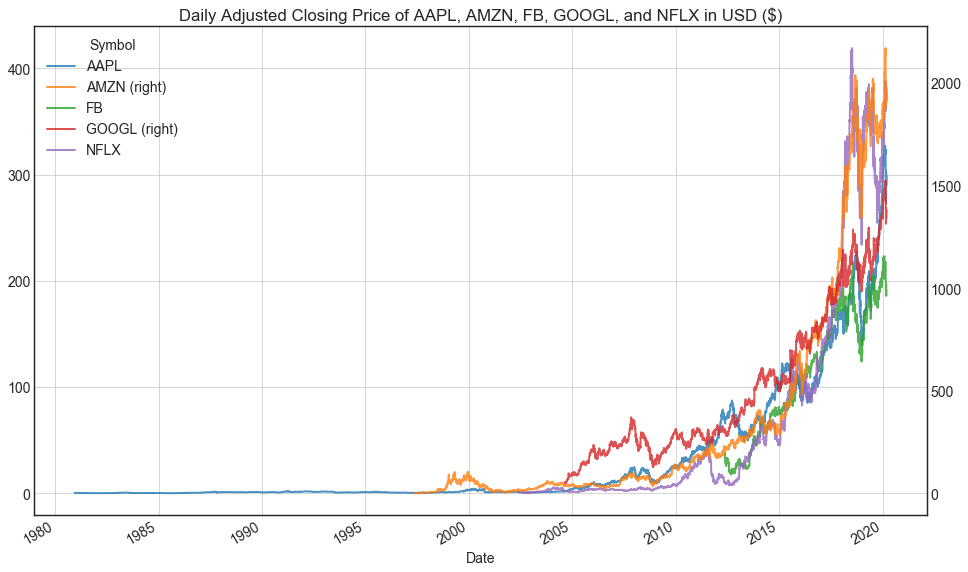

In [10]:
# reshape the data frame for visualisation:
df_adj_close_viz = df_adj_close.pivot(columns='Symbol')
df_adj_close_viz.columns = df_adj_close_viz.columns.droplevel(0)
df_adj_close_viz.plot(secondary_y=['AMZN', 'GOOGL'], grid=True, linewidth=2, alpha=0.8)
plt.title('Daily Adjusted Closing Price of AAPL, AMZN, FB, GOOGL, and NFLX in USD ($)')

In [11]:
# to check: display a random sampling of 5 rows
# df_adj_close_viz.sample(5, random_state=0)

From data point of view, it is evident that these stocks share a common `end_date` i.e. 2020-03-04 whereas `start_date`  differs from each other.

> <li><b>Question 1:</b> Given a selection of companies, which stock should I buy according to my financial budget?</li>

To address the first question raised in this study, it seems like AMZN and GOOGL seem out of the league as the price per share for each stocks exceeds USD2500 and USD1400 respectively as of June 2020. 

### Missing Data Analysis
Although the data is claimed to have 'daily' frequency, we need to check if this is true or not. Is there any missing trading days in the data?

In [12]:
# is there any missing datapoints in the data? 
df_adj_close.isna().sum()

Adj_Close    0
Symbol       0
dtype: int64

In [13]:
# define function to identify the missing trading day(s) for each company:

def missing_dates(data):
    
    grouped = data.groupby('Symbol')
    output = []
    for key, value in grouped:
        
        data_dates = value.index.sort_values()
        trading_days = len(data_dates)
        
        start_date = data_dates[0]
        end_date = data_dates[-1]
        
        business_dates = pd.date_range(start_date, end_date, freq=BDay())
        total_bdays = len(business_dates)
        
        dates_missing = pd.to_datetime([item for item in business_dates if item not in data_dates], format='%Y-%m-%d')
        missing_days = len(dates_missing)
        missing_perc = round(missing_days/total_bdays*100.0, 2)
        
        data_dict = {'Symbol':key,'Start_date':start_date, 'End_date':end_date, 'Business_days':total_bdays,
                     'Trading_days':trading_days, 'Missing_days':missing_days, 'Missing_percentage':missing_perc,
                     'Missing_dates': dates_missing}
        output.append(data_dict)
        df = pd.DataFrame(output)
        df.sort_values('Start_date').reset_index(drop=True)

    return df

In [14]:
missing_dates(df_adj_close)

,Symbol,Start_date,End_date,Business_days,Trading_days,Missing_days,Missing_percentage,Missing_dates
0,AAPL,1980-12-12,2020-03-04,10234,9889,345,3.37,"DatetimeIndex(['1980-12-25', '1981-01-01', '19..."
1,AMZN,1997-05-15,2020-03-04,5950,5738,212,3.56,"DatetimeIndex(['1997-05-26', '1997-07-04', '19..."
2,FB,2012-05-18,2020-03-04,2034,1960,74,3.64,"DatetimeIndex(['2012-05-28', '2012-07-04', '20..."
3,GOOGL,2004-08-19,2020-03-04,4055,3912,143,3.53,"DatetimeIndex(['2004-09-06', '2004-11-25', '20..."
4,NFLX,2002-05-23,2020-03-04,4640,4476,164,3.53,"DatetimeIndex(['2002-05-27', '2002-07-04', '20..."


There is a very little percentage of missing datapoints in the data (on the basis of trading days are conducted during business days). Further inspection reveals that these dates are attributed to the public holidays in the United States, thus no stock trading are held on these days.

| Date       | Day       | Event            |
|:----------:|:---------:|:-----------------|
| 1981-01-01 | Thursday  | New Year's Day   |
| 1997-05-26 | Monday    | Memorial Day     |
| 1997-07-04 | Friday    | Independence Day |
| 2000-07-04 | Tuesday   | Independence Day |
| 2012-05-28 | Monday    | Memorial Day     |
| 2012-07-04 | Wednesday | Independence Day |






### Lag Plot: dechiper more information from a time series

Time series modeling assumes that <b>there is a relationship between an observation and the previous observation</b>. A `lag` is a fixed time displacement and a `lag plot` is useful in exploring the relationship between a selected observation and a lag of that observation. Data randomness, model suitability, presence of outliers, serial correlation, and seasonality are some of the properties of a time series that can be deciphered from the lag plot.

Given a data values of <i>Y<sub>1</sub></i>, <i>Y<sub>2</sub></i>, <i>Y<sub>3</sub></i> ..., <i>Y<sub>n</sub></i>,  the k-period (or <b><i>k<sup>th</sup></i></b>) lag of the value <i>Y<sub>i</sub></i> is defined as the data point that occurred k
time points before time <b><i>i</i></b>: 

> <b><i>Lag<sub>k</sub>(Y<sub>i</sub>) = Y<sub>i-k</sub></i></b>



In [15]:
# define funtion to plot weekly lagging:

def lag_plot_weekly(data, company):
    
    grouped = data.groupby('Symbol')

    for key, value in grouped:
        if key == company:
            data = value[value['Symbol']== key]['Adj_Close']

            lags = 7
            columns = [data]
            for i in range(1,(lags + 1)):
                columns.append(data.shift(i))
            dataframe = pd.concat(columns, axis=1)
            columns = ['t+1']
            for i in range(1,(lags + 1)):
                columns.append('t-' + str(i))
            dataframe.columns = columns
            
            if key == 'AAPL':
                color = 'blue'
            elif key == 'FB':
                color = 'green'
            else:
                color = 'purple'
            
            plt.figure(figsize=(20,8))
            for i in range(1,(lags + 1)):
                ax = plt.subplot(240 + i)
                plt.subplots_adjust(hspace=0.5, wspace=0.3)
                ax.set_title('t+1 vs t-' + str(i))
                plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values, alpha=0.2, color=color)
                ax.set_ylabel('t-' +str(i))
                ax.set_xlabel('t')
            plt.suptitle('Lag Plot for {}'.format(key), fontdict = {'fontsize' : 20})

        plt.show()
    

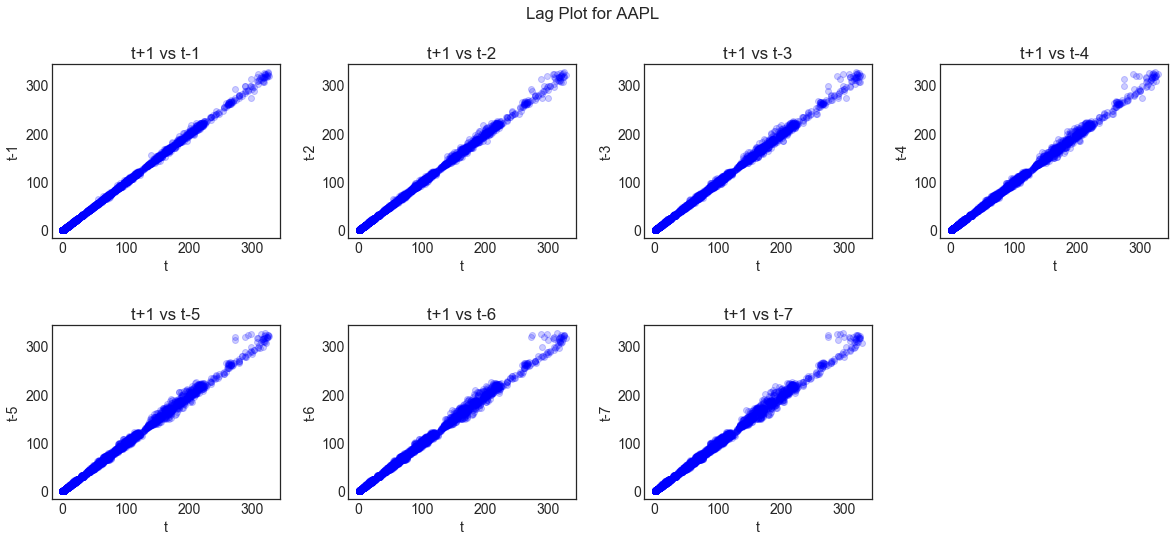

In [16]:
lag_plot_weekly(stock_data, 'AAPL')

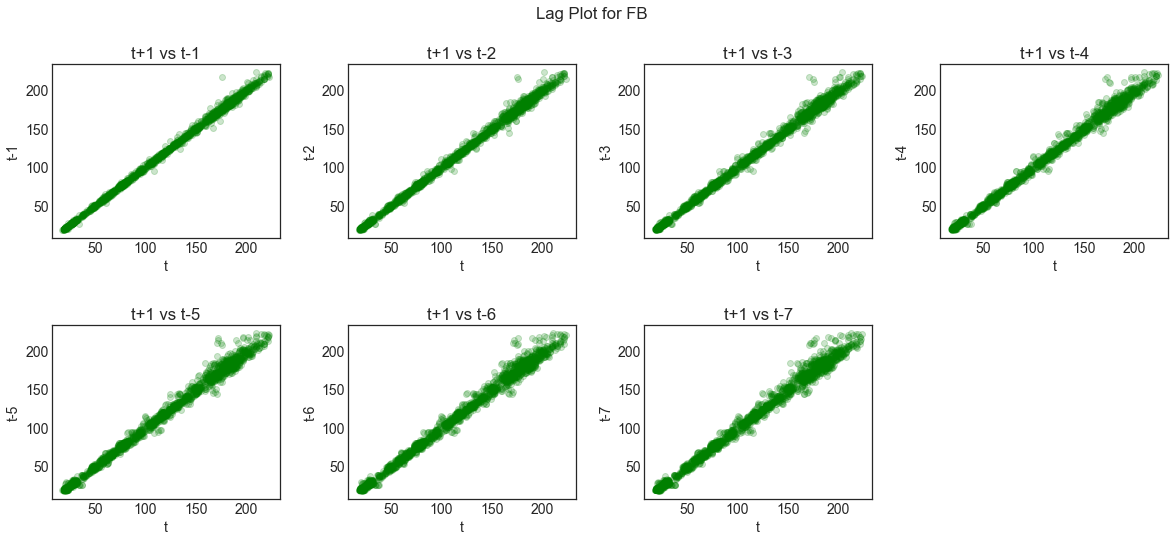

In [17]:
lag_plot_weekly(stock_data, 'FB')

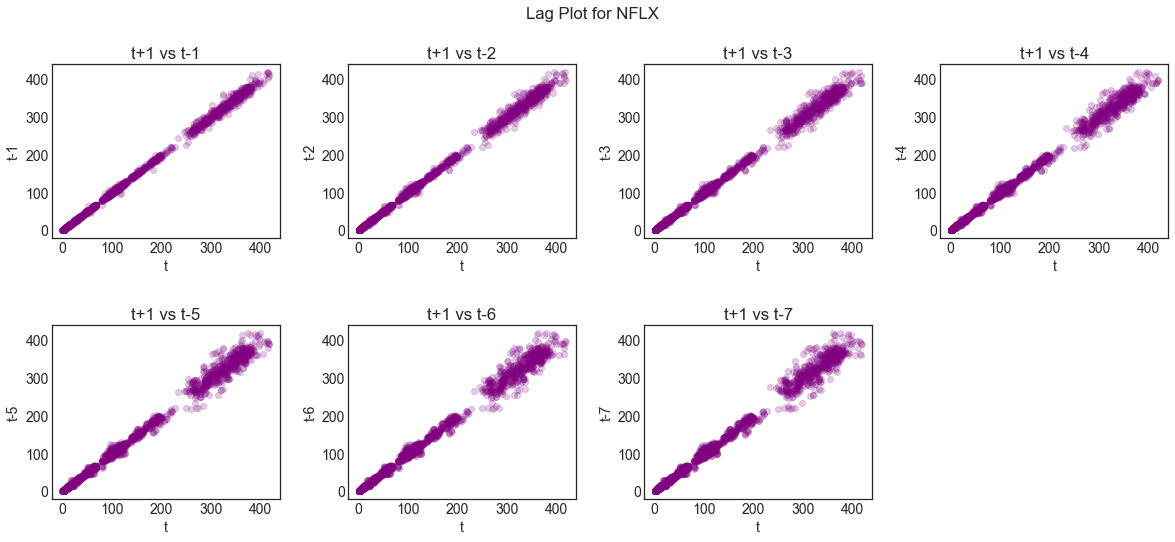

In [18]:
lag_plot_weekly(stock_data, 'NFLX')

<p style="font-size:18px"><b>Explanation:</b></p>

<p style='text-align: justify; margin-right: 20px'> The shape of the lag plot provides clue about the underlying structure of the data; and it this case, the lag plots for the selected companies (AAPL, FB, and NFLX) exhibit <b>strong positive linear pattern</b> thus implying that the time series are strongly <b>non-random</b> and an <b>autoregressive model</b> is probably a better choice. Presence of <b>outliers</b> in the data is evident especially in the higher value ranges. Data with seasonality will repeat itself periodically in a sine or cosine-like wave but in our case, no such pattern can be observed, thus none of the data exhibits seasonality.</p>
    
    
<p style='text-align: justify; margin-right: 20px'> Although <b>postitive autocorrelation</b> is present, the strength of the autocorrelation weakens day by day seeing that the first lag has datapoints that are tightly clustered around the diagonal, but the datapoints begin to disperse away from the diagonal in the next lag and beyond. To be exact, the adjusted closing price in a particular day differs greatly from the price it was at the same day in the previous week, thus lead us to this question:.</p>

> <li><b>Question 2:</b> How volatile are the selected stocks?</li>
 
    
 

<p style='text-align: justify; margin-right: 20px'> <b>Volatility</b> is a measure of dispersion around the mean or average return of a stock. Volatility can be measured using the <b>standard deviation</b>, which signals how tightly the price of a stock is grouped around the mean or moving average (MA). When prices are tightly bunched together, the standard deviation is small. Contrarily, when prices are widely spread apart, the standard deviation is large. <b>Rolling means</b> (or moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends.</p>

> **Volatility = returns.std() * np.sqrt(days)**

We use the `rolling()` method with `window = 25`2 to compute the annual rolling mean of our daily stock price data to compare the annual volatility of the stocks.

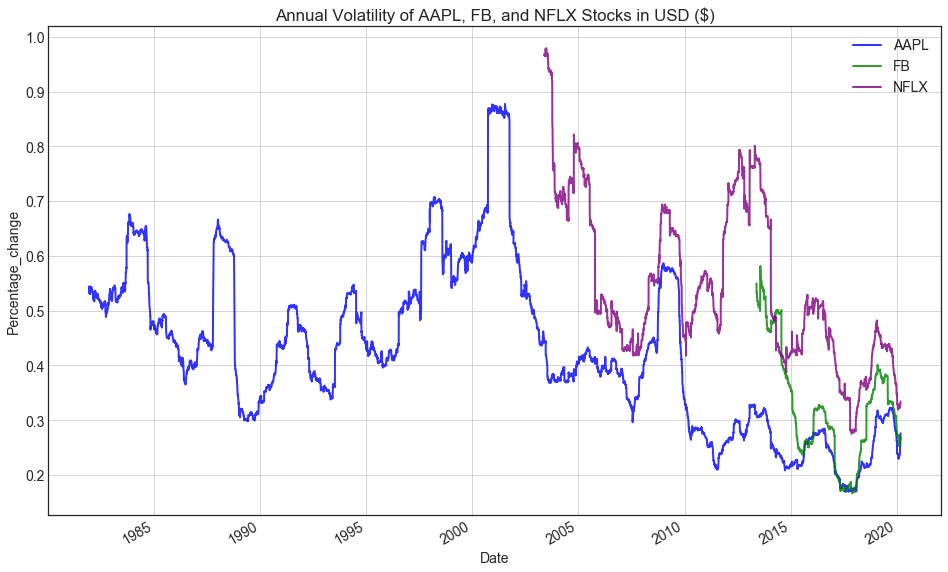

In [19]:
# subset the selected stocks:
df = df_adj_close[df_adj_close['Symbol'].isin(['AAPL', 'FB', 'NFLX'])]

# calculate percentage change and volatility
for key, value in df.groupby('Symbol'):
    min_periods = 252  # the average trading days per year
    percentage_change = value['Adj_Close'].pct_change()
    volatility = percentage_change.rolling(min_periods).std()*np.sqrt(min_periods)
    if key == 'AAPL':
        color = 'blue'
    elif key == 'FB':
        color = 'green'
    else:
        color = 'purple'
    # plot annual stock volatility 
    volatility.plot(grid=True, linewidth=2, alpha=0.8, color=color)
    plt.legend(['AAPL', 'FB', 'NFLX'])
    plt.ylabel('Percentage_change')
    plt.title('Annual Volatility of AAPL, FB, and NFLX Stocks in USD ($)')

----
## Confirmatory Data Analysis <a name="cda"></a>

<p style='text-align: justify; margin-right: 20px'> For modeling purpose, we will chose <b>Apple (AAPL)</b> data as it has most datapoints due to longer years of trading and despite  disruptions in society and business caused by the recent coronavirus pandemic has battered the stock market, AAPL is uniquely positioned to perform well. Regarded as one of the Big Four technology companies along with Google, Amazon, and Microsoft, Apple's stock price meteoric rise everytime the company releases its new product.

<p style='text-align: justify; margin-right: 20px'> To recall, the line plot shows the adjusted closing price of AAPL <i>increases in general</i> since its commencement in the U.S stock market.

Text(0.5, 1.0, 'Daily Adjusted Closing Price of AAPL in USD ($)')

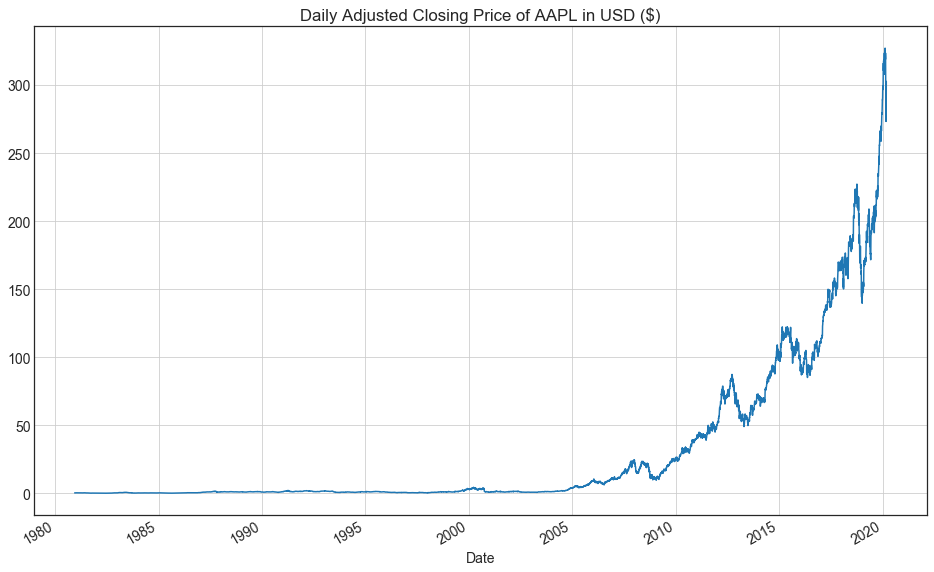

In [20]:
df_adj_close_viz['AAPL'].plot(grid=True)
plt.title('Daily Adjusted Closing Price of AAPL in USD ($)')

<p style='text-align: justify; margin-right: 20px'> However, there is no obvious pattern in the fluctuation of the AAPL stock price. When decomposing the time series into its components i.e. Trend, Seasonal and Residual, AAPL data shows an obvious upward trend but has insignificant seasonality (be it daily or annually) and unstable variance.</p>



### Time Series Components

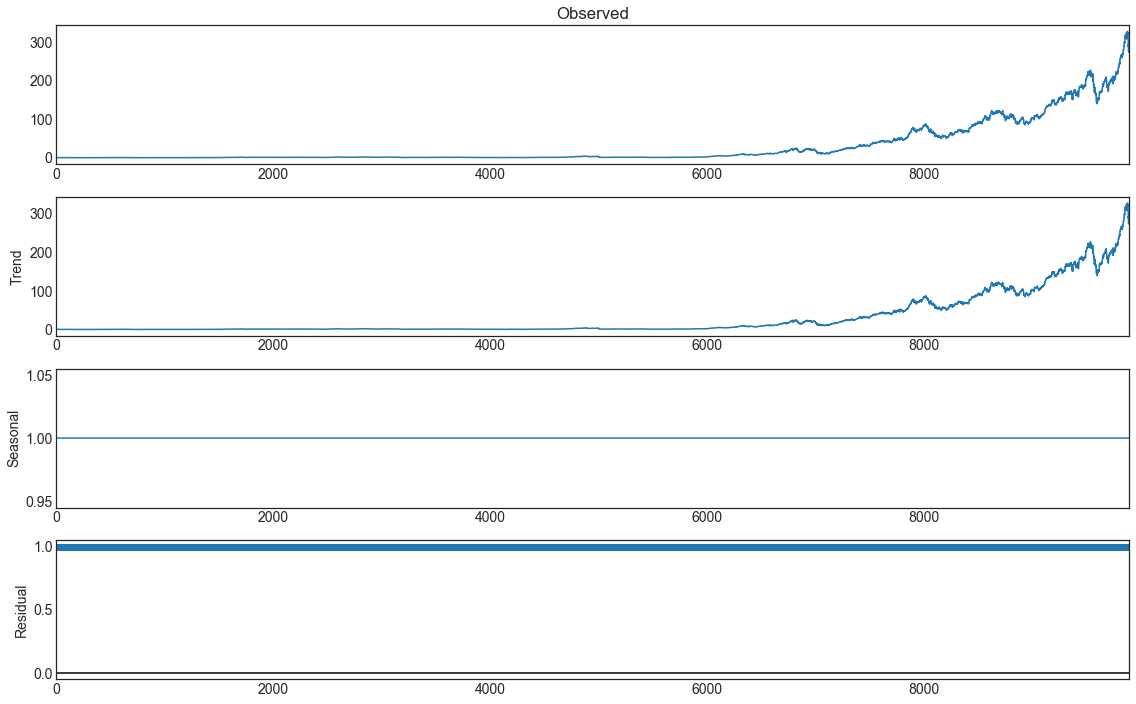

In [21]:
# subset data for the company of interest
company_data = stock_data[stock_data['Symbol']=='AAPL']

# create a new dataframe contain only the 'Adj_Close' column, then convert the dataframe to a series
data = company_data.filter(['Adj_Close'])
series = data.values

# decompose time series into its component
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
plt.show()

<p style='text-align: justify; margin-right: 20px'> To stabilize the variance in a time series (hence make it stationary), we can use logarithm transformation on the original data. Time series is stationary when its mean and variance are not a function of time (i.e. they are constant through time). Stationarity is important because most of the statistical methods to perform analysis and forecasting work on the assumption that the statistical properties (mean, variance, correlation, etc.) of the series are constant in time. </p>

### Time Series Stationarity

<p style='text-align: justify; margin-right: 20px'> To test (and measure) the stationarity of a time series, ones need to check how the statistical properties vary in time. This can be done either by visual inspection of the datapoints or by performing <b>Dickey-Fuller test</b> - a statistical test that is normally used in Time Series Analysis to check for the stationarity of a univariate series by deciphering the presence of unit root in the series. Parameters such as <b>p-value</b>, <b>test statistic</b> and <b>crtitical values</b> derived from the test will be used to interpret the test result.</p>

The null and alternate hypothesis of this test are:

> <li><b>H<sub>0</sub>:</b> The time series has a unit root, thus it is non-stationary.</li>
> <li><b>H<sub>a</sub>:</b> The time series has no unit root, thus it is stationary.</li>


If `test statistic > critical value`, the <b>H<sub>0</sub></b> is accepted thus the series is regarded as non-stationary. 

<b>H<sub>0</sub></b> is rejected when `test statistic < critical value`, thus implying that the series is stationary. 




In [22]:
# define function for ADF test

def adf_test(timeseries):
    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [23]:
# define function for testing data stationarity

def stationarity_test(timeseries):
    
    # calculate rolling statistics
    rolmean = timeseries.rolling(window=5).mean()
    rolstd = timeseries.rolling(window=5).std()
    
    # plot rolling statistics:
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    adf_test(timeseries)

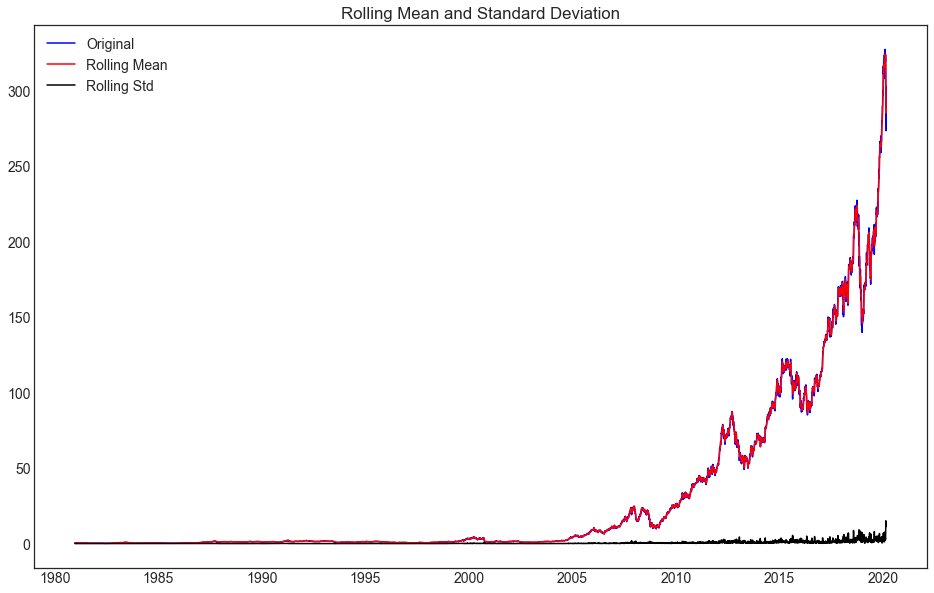

Results of Dickey-Fuller Test:
Test Statistic                    4.684072
p-value                           1.000000
#Lags Used                       37.000000
Number of Observations Used    9851.000000
Critical Value (1%)              -3.431014
Critical Value (5%)              -2.861833
Critical Value (10%)             -2.566926
dtype: float64


In [24]:
# apply function to test data stationarity
stationarity_test(data)

By plotting the `standard deviation` and `mean` along with the original data points, we can see that both are time-dependent. 

**Result:** 
> - **Test Statistic = 2.61** i.e. `test statistic > critical value` 
> - The null hypothesis is failed to be rejected thus clearly implying that the original time series is non-stationary. 

<p style='text-align: justify; margin-right: 20px'> To make a time series  stationary, <b>Transformation</b> and <b>Differencing</b> are the two common methods that can be applied. Trend and seasonality need to be removed from the data and in our case, trend is main culprit that is causing the non-stationarity. </p>

<li>Transformation (log, square root, cube root, etc.) will reduce the trend by penalising higher values more than smaller values.</li>
<li>Differencing method will take the difference of an observation at a particular instant with that at the previous point in time. </li>


<p style='text-align: justify; margin-right: 20px'>  First, let's apply <b>Log Transformation</b> and <b>Moving Average Smoothing</b> to the original time series and check the  stationarity of the output. Application of smoothing technique over the transformed data will remove noise that may be present.</p>

In [25]:
# log-transformed the data
ts_log = np.log(data)

# replace infs with NaN
ts_log.replace([np.inf, -np.inf], np.nan, inplace=True)

# remove all the NaN values
ts_log.dropna(inplace=True)

# get the moving average of the series
moving_avg = ts_log.rolling(5).mean()

# subtract the moving average of the log-transformed dataframe
ts_log_moving_avg_diff = ts_log - moving_avg

# remove all the NaN values
ts_log_moving_avg_diff.dropna(inplace=True)

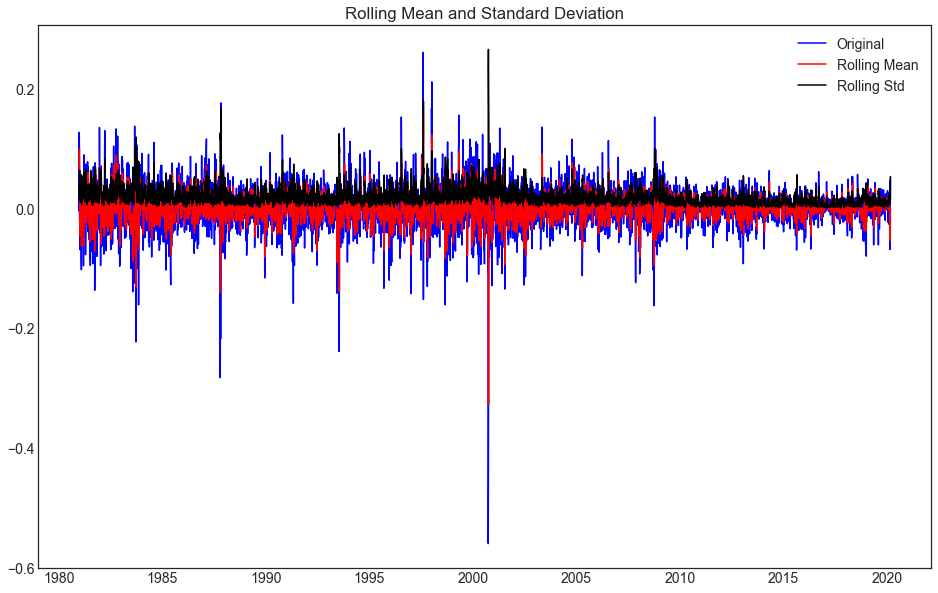

Results of Dickey-Fuller Test:
Test Statistic                  -25.027991
p-value                           0.000000
#Lags Used                       11.000000
Number of Observations Used    9873.000000
Critical Value (1%)              -3.431013
Critical Value (5%)              -2.861833
Critical Value (10%)             -2.566926
dtype: float64


In [26]:
# apply function to test data stationarity on the log-transformed series
stationarity_test(ts_log_moving_avg_diff)

**Result:** 
> - **Test Statistic = -12.09** i.e. `test statistic < critical value`  
> - The null hypothesis is rejected thus implying that the log-transformed time series is stationary. 

Next, let's apply first order Differencing to the log-transformed data and check its stationarity:

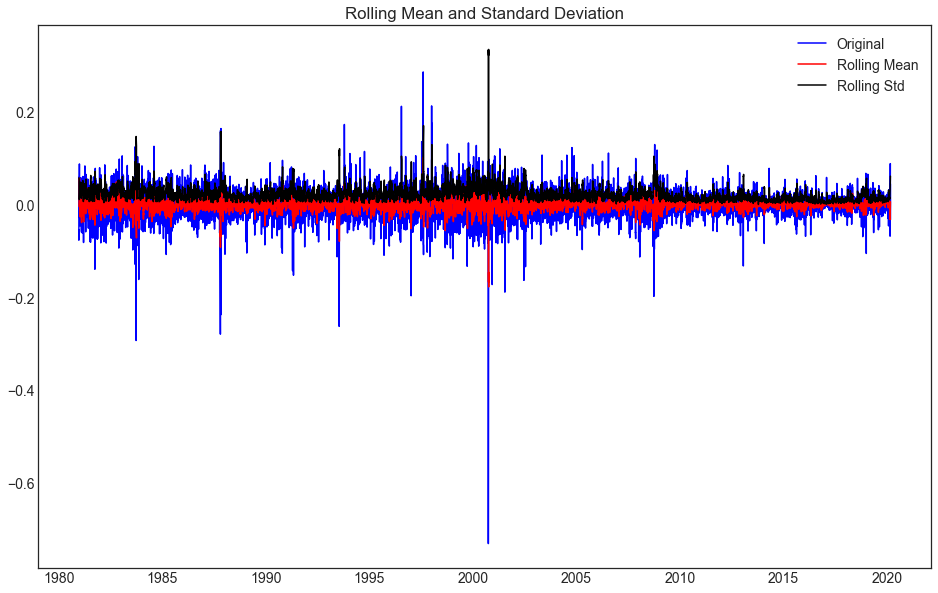

Results of Dickey-Fuller Test:
Test Statistic                  -22.636068
p-value                           0.000000
#Lags Used                       16.000000
Number of Observations Used    9871.000000
Critical Value (1%)              -3.431013
Critical Value (5%)              -2.861833
Critical Value (10%)             -2.566926
dtype: float64


In [27]:
# apply first order differencing to the log-transformed data
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)

# apply function to test data stationarity on the differencing series
stationarity_test(ts_log_diff)

**Result:** 
> - **Test Statistic = -12.86** i.e. `test statistic < critical value`  
> - The null hypothesis is rejected thus implying that the time series is stationary. 

With combination of log transformation and differencing, the Test Statistic becomes more negative therefore there is stronger evidence to reject the null hypothesis of a unit root.

----
## Predictive Model <a name="modeling"></a>

### Defining metrics for model evaluation

To evaluate model performance, ones can measure the 'forecast error' that is the difference between the actual values (y) and the predicted values (ŷ) output from the model. Forecast error is also termed as `loss function`. 

In general, there are two kinds of forecast errors; <i>scale-dependent errors</i> and <i>percentage errors</i>. For our project, we will use `root mean squared error (RMSE)` and `mean absolute percentage error (MAPE)` as the model metrics. Each are the scale-dependent errors and the percentage errors respectively. 

\begin{equation*}
RMSE =
\sqrt{\frac1n \sum_{}e_t^2} 
\end{equation*}



\begin{equation*}
MAPE =
\frac1n \sum_{} \frac{\begin{vmatrix}e_t\end{vmatrix}}{d_t}
\end{equation*}




In [28]:
# define functions to output metrics for model evaluation:

def root_mean_squared_error(actual, pred):
    rmse = np.sqrt(np.mean(pred-actual)**2)
    return rmse

def mean_absolute_percentage_error(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    mape = np.mean(np.abs((actual - pred) / actual)) * 100
    return mape

### Modeling Method 1: Auto-ARIMA

<b>ARIMA</b> is a very popular statistical method for time series forecasting. The model take into account the past values to predict the future values. 

Three important components in ARIMA:

> <li><b>p</b> : associated with the auto-regressive (AR) aspect of the model, which incorporates past values to forecast the next value.</li>
> <li><b>d</b> : associated with the integrated (I) part of the model, which is related to the order of differencing to apply to a time series.</li>
> <li><b>q</b> : associated with the moving average (MA) part of the model, which uses past forecast errors to predict the future value.</li>


[<b>Auto-ARIMA</b>](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html) automatically selects the best combination of (p,q,d) that provides the least error, plus it does not consume a lot of time than the manual parameter tuning in ARIMA. `Auto-ARIMA` automatically conducts differencing tests (i.e. Augmented Dickey-Fuller (ADF) test) to determine the order of differencing, d, and then fitting models within ranges of defined `start_p`, `max_p`, `start_q`, `max_q` ranges. 

If the seasonal option is enabled, auto-ARIMA also seeks to identify the optimal `P` and `Q` hyper-parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, `D`.

In [29]:
# Get the number of rows to train the model on
training_data_len = math.ceil(len(data) * .8)

# subset training data
train_data = data[0:training_data_len]

# subset testing data
test_data = data[training_data_len:]

# convert each dataset to a numpy array
train, test = train_data.values, test_data.values

<img src="./images/arima_train_test_split.png" style="height:300px">

In [30]:
# initialize Auto-ARIMA model:
model = auto_arima(train, start_p=1, start_q=1, max_p=3, max_q=3, 
                   m=12, start_P=0, seasonal=False, d=1, D=1, trace=True, 
                   error_action='ignore', suppress_warnings=True)

# fit model to the training series
model.fit(train)

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=762.096, BIC=790.000, Time=3.297 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=790.269, BIC=804.221, Time=0.520 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=785.152, BIC=806.080, Time=0.882 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=785.326, BIC=806.254, Time=0.541 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=797.589, BIC=804.565, Time=0.211 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=773.010, BIC=807.890, Time=3.712 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=772.739, BIC=807.619, Time=3.547 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=786.151, BIC=814.055, Time=0.915 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=786.022, BIC=813.926, Time=1.196 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=757.038, BIC=798.894, Time=6.819 seco

ARIMA(maxiter=50, method='lbfgs', order=(3, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

**AIC** and **BIC** are both penalized-likelihood criteria:

* **AIC** is an estimate of a constant plus the relative distance between the unknown true likelihood function of the data and the fitted likelihood function of the model, so that a lower AIC means a model is considered to be closer to the truth. 
* **BIC** is an estimate of a function of the posterior probability of a model being true, under a certain Bayesian setup, so that a lower BIC means that a model is considered to be more likely to be the true model

In [31]:
# make predictions based on the fitted model
predictions = model.predict(n_periods = test.shape[0])

In [32]:
# output model metrics for model evaluation
arima_rmse = root_mean_squared_error(test, predictions)
arima_mape = mean_absolute_percentage_error(test, predictions)

output=[]
output.append({'Model': 'Auto-Arima', 'RMSE': arima_rmse, 'MAPE': arima_mape, 'Predictions': predictions})
arima_metrics = pd.DataFrame(output)
arima_metrics

,Model,RMSE,MAPE,Predictions
0,Auto-Arima,49.698489,35.799058,"[69.2334352975805, 69.2701611222995, 69.205991..."


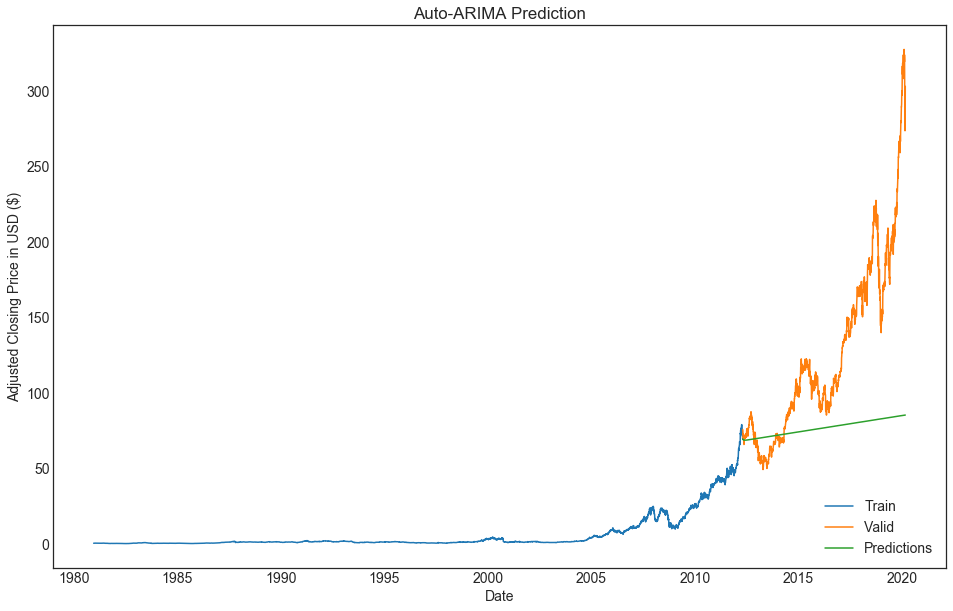

In [33]:
# plot Train, Valid and Predictions data:
pred_data = pd.DataFrame(predictions, index=test_data.index, columns=['Prediction'])

plt.plot(train_data)
plt.plot(test_data)
plt.plot(pred_data)
plt.title('Auto-ARIMA Prediction')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price in USD ($)')
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')

An auto-ARIMA model uses past data to understand the pattern in the time series. Using these values, the model captured an increasing trend in the series (but does not focus on the seasonal part). Although the predictions using this technique are far better than ARIMA or other common machine learning models, these predictions are still not close to the real values.

### Modeling Method 3: Long short-term memory (LSTM)

Long Short Term Memory networks or `LSTM` is an advanced version of Recurrent Neural Network (RNN) that is capable of learning long-term dependencies by storing important past information and forgetting the information that is not important. LSTM has been widely used for sequence prediction problems is are proven to be extremely effective. 

Architecturally, LSTM consists of cells with three gates that regulate the 'movement' of information in the network:

> <li><b>Input gate</b> adds information to the cell state </li>
> <li><b>Forget gate</b> removes information that is no longer required by the model </li>
> <li><b>Output gate</b> selects the information to be shown as output </li>

<img src="./images/LSTM3-focus-f.png" style="height:150px">
<img src="./images/LSTM3-focus-C.png" style="height:150px">
<img src="./images/LSTM3-focus-i.png" style="height:150px">
<img src="./images/LSTM3-focus-o.png" style="height:150px">

[Christopher Olah](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) has paraphrased the complex concept of LSTM into digestible information.

In [34]:
# convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# create training dataset
# scale the train data 
train_data = scaled_data[0:training_data_len, :]
# append the past-60-day values to X_train dataset and every 61st-day value to y_train
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
# convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)
# reshape X_train dataset
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# create testing dataset
# scale the test data and create X_test and y_test dataset
test_data = scaled_data[training_data_len-60:,:]

# Create the dataset X_test and y_test
X_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

# convert X_test and y_test to numpy array
X_test = np.array(X_test)

# reshape X_test dataset
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

<img src="./images/lstm_train_test_split.png" style="height:300px">

In [35]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=1, epochs=4)

W0622 12:21:09.992004 22404 deprecation_wrapper.py:119] From C:\Users\norzarifah.k\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0622 12:21:10.003489 22404 deprecation_wrapper.py:119] From C:\Users\norzarifah.k\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0622 12:21:10.005518 22404 deprecation_wrapper.py:119] From C:\Users\norzarifah.k\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0622 12:21:10.330811 22404 deprecation_wrapper.py:119] From C:\Users\norzarifah.k\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer i

Epoch 1/4
7852/7852 [==============================] - 320s 41ms/step - loss: 3.9987e-05
Epoch 2/4
7852/7852 [==============================] - 312s 40ms/step - loss: 1.6999e-05
Epoch 3/4
7852/7852 [==============================] - 317s 40ms/step - loss: 1.1649e-05
Epoch 4/4
7852/7852 [==============================] - 333s 42ms/step - loss: 7.1671e-06


In [36]:
# Get the predicted price value from the model
predictions = model.predict(X_test)

# Transform the scaled predictions to the actual value
predictions = scaler.inverse_transform(predictions)

In [37]:
# output model metrics for model evaluation
lstm_rmse = root_mean_squared_error(y_test, predictions)
lstm_mape = mean_absolute_percentage_error(y_test, predictions)

output=[]
output.append({'Model': 'LSTM', 'RMSE': lstm_rmse, 'MAPE': lstm_mape, 'Predictions': predictions})
lstm_metrics = pd.DataFrame(output)
lstm_metrics

,Model,RMSE,MAPE,Predictions
0,LSTM,4.422914,2.959188,"[[69.09267], [73.1252], [74.214424], [73.65232..."


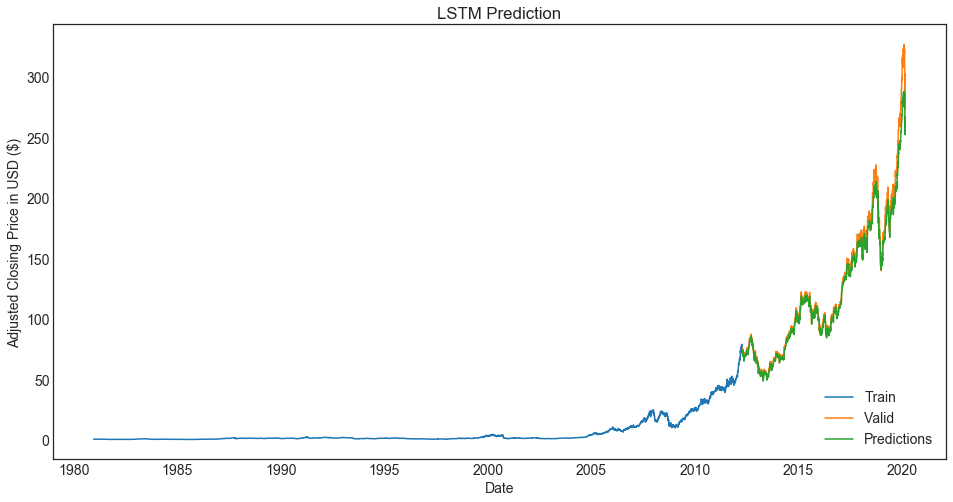

In [38]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualise the data
plt.figure(figsize=(16,8))
plt.title('LSTM Prediction')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price in USD ($)')
plt.plot(train['Adj_Close'])
plt.plot(valid[['Adj_Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

----
## Evaluation and Analysis <a name="analysis"></a>

In comparison to Auto-ARIMA, LSTM gives better predictions; supported by the metrics values:

In [39]:
# dataframe for model metrics
frames = [arima_metrics, lstm_metrics]
compare_metrics = pd.concat(frames).reset_index(drop=True)
compare_metrics

,Model,RMSE,MAPE,Predictions
0,Auto-Arima,49.698489,35.799058,"[69.2334352975805, 69.2701611222995, 69.205991..."
1,LSTM,4.422914,2.959188,"[[69.09267], [73.1252], [74.214424], [73.65232..."


Taking this into account, we will pick LSTM for model validation thus addressing this question:

> <li><b>Question 3:</b> What is the expected closing price of the selected stock at a given date?</li>

In [42]:
# Predict the stock price for 2020-02-04

company_subset = data.loc['2010-01-01':'2020-03-02']

# Get the last 60-day closing price values and convert the dataframe to an array
last_60_days = company_subset[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create a list for the the last 60-day
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Fit in the model to get the predicted scaled price
pred_price = model.predict(X_test)

# Unscale the data
pred_price = scaler.inverse_transform(pred_price)
print('The predicted stock price of AAPL on 2020-03-03')
print(pred_price)

# actual stock price for 2019-12-18
print()
print('The actual stock price of AAPL on 2020-03-03')
data.loc['2020-03-02':'2020-03-04']

The predicted stock price of AAPL on 2020-03-03
[[267.16962]]

The actual stock price of AAPL on 2020-03-03


,Adj_Close
Date,
2020-03-02,298.809998
2020-03-03,289.320007
2020-03-04,302.739990


<p style="font-size:18px"><b>Explanation:</b></p>

Although the predicted value <b>USD267.17</b> of the adjusted closing price varies from the actual value <b>USD289.32</b> at the selected date of <b>March 3<sup>rd</sup> 2020</b>, the predicted price is actually decreases than the actual adjusted closing price of the previous day, hence the model somehow able to detect the decreasing pattern of the stock price.

## Reference
Hyndman, R.J., & Athanasopoulos, G. (2018) Forecasting: principles and practice, 2nd edition, OTexts: Melbourne, Australia. OTexts.com/fpp2. Accessed on 1st June 2020.

https://www.franklintempleton.com/forms-literature/download/IBS-SIDFL

Hezagy, O., Soliman, O. S., Abdul Salam, M. (2013). A Machine Learning Model for Stock Market Prediction. International Journal of Computer Science and Telecommunications, 4, 12, 17 - 23. https://www.researchgate.net/publication/259240183

Vargas, M. R., de Lima, B. S. L., Evsukoff, A. (2017). Deep learning for stock market prediction from financial news articles. IEEE International Conference on Computational Intelligence and Virtual Environments for Measurement Systems and Applications (CIVEMSA), Annecy, 2017, 60-65, doi: [10.1109/CIVEMSA.2017.7995302](10.1109/CIVEMSA.2017.7995302)